# Don't Get Kicked!

Machine Learning project for predicting a best used car purchased at auction.

# 1. Introduction

An auto dealership often purchases a used car at an auto auction. This used car might have serious issues that cannot sell to customers. The auto community calls these unfortunate purchases "kicks". The purpose of this project is to build a model to predict if the car purchased at the Auction is a Kick (bad buy). All project data come from the [Kaggle](https://www.kaggle.com/c/DontGetKicked/data). I propose to use logistic regression as the main algorithm to create the classifier. After training and tuning hyperparameter of the classifier, the area under the curve (AUC) of my classifier is 0.73. The F1 score of my classifier is 0.35. The accuracy of the prediction on the testing dataset is 95%. This is a well-documented IPython file to explain how to step-by-step analyze this project. 

In this project, I will follow steps from _Hands-On Machine Learning with Scikit-Learn and TensorFlow_. This book provides a great strategy how to do an end-to-end machine learning project. I highly recommend this strategy for the machine learning project.

# 2. Look at the Big Picture

## Frame the Problem

The project target is to predict if the car purchased at the Auction is a Kick (bad buy).Therefore, I frame this project as a supervised classification problem.

## Select a Performance Measure

I know this project is a supervised classification problem. Furthermore, this project is a binary classification problem(is a bad buy or isn't a bad buy). Therefore, I use three method to evaluate the performance of the model. I evaluate the performance of a classifier using F1 score. The F1 score is the combination of precision and recall, which is the harmonic mean of precision and recall. Also, I evaluate the performance of classifier use AUC of ROC (receiver operating characteristic). The ROC is another common tool used with binary classifiers. Finally, I evaluate the prediction accuracy of the testing dataset.

## Check the Assumptions

It is good to list and verify the assumptions we make. In this project, I frame this problem as a classification task.

# 3. Get the Data

## Downnload the Data

I download data from Kaggle. Now I load the data using Pandas. Here, I write a small class including some functions to load different data.

In [30]:
import os
import csv
import pandas as pd
import numpy as np

# Where to open datasets
PROJECT_ROOT_DIR = '.'
DATASETS_PATH = os.path.join(PROJECT_ROOT_DIR, 'datasets')

class loading: 
    
    def load_train_car_data(version='old', path=DATASETS_PATH):
        if version is 'old': 
            csv_path = os.path.join(path, 'train_set.csv')
        
        if version is 'new':
            csv_path = os.path.join(path, 'train_set_new.csv')
        
        return pd.read_csv(csv_path)

    def load_test_car_data(version='old', path=DATASETS_PATH):
        if version is 'old': 
            csv_path = os.path.join(path, 'test_set.csv')
        
        if version is 'new':
            csv_path = os.path.join(path, 'test_set_new.csv')
        
        return pd.read_csv(csv_path)

    def load_test_labels_car_data(path=DATASETS_PATH):
        csv_path = os.path.join(path, 'test_labels_set.csv')
        
        return pd.read_csv(csv_path)
    
    def redefine_train_category(data_name='train_set', path=DATASETS_PATH):
        csv_path_in = os.path.join(path, data_name + '.csv')
        csv_path_out = os.path.join(path, data_name + '_new.csv')

        with open(csv_path_in) as in_file, open(csv_path_out, 'w') as out_file:
            reader = csv.reader(in_file)
            writer = csv.writer(out_file)

            for row in reader:
                purch_day = row[2]
                make = row[6]
                transmission = row[11]

                # Change purchasing day category
                if purch_day[-4:] == '2009':
                    row[2] = 2009
                elif purch_day[-4:] == '2010':
                    row[2] = 2010

                # Change purchasing day category
                if make in ('LEXUS', 'TOYOTA SCION', 'ACURA', 'SUZUKI',
                            'HONDA', 'INFINITI', 'SUBARU', 'SCION',
                            'ISUZU', 'MAZDA', 'MITSUBISHI', 'TOYOTA',
                            'NISSAN'):
                    replaced = row[6].replace(make,'JAPANESE')
                    row[6] = replaced
                elif make in ('CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER',
                              'PONTIAC', 'SATURN', 'JEEP', 'MERCURY',
                              'BUICK', 'GMC', 'OLDSMOBILE', 'LINCOLN',
                              'CADILLAC', 'PLYMOUTH', 'HUMMER'):
                    replaced = row[6].replace(make,'AMERICA')
                    row[6] = replaced
                elif make in ('KIA', 'HYUNDAI'):
                    replaced = row[6].replace(make,'OTHER')
                    row[6] = replaced
                elif make in ('VOLKSWAGEN', 'VOLVO', 'MINI'):
                    replaced = row[6].replace(make,'EUROPR')
                    row[6] = replaced

                # Change transmission category
                if transmission in ('Manual'):
                    replaced = row[11].replace(transmission,'MANUAL')
                    row[11] = replaced

                # Drop some of the less useful categories
                row = (row[0], row[1], row[2], row[3], row[4], row[5],row[6], 
                       row[11], row[12], row[13], row[14], row[15], row[16], 
                       row[17], row[18], row[19], row[20], row[21], row[22], 
                       row[23], row[24], row[25], row[26], row[27], row[28], 
                       row[29], row[31], row[32], row[33])

                # Write each row into the new file
                writer.writerow(row)
            
    def redefine_test_category(data_name='test_set', path=DATASETS_PATH):
        csv_path_in = os.path.join(path, data_name + '.csv')
        csv_path_out = os.path.join(path, data_name + '_new.csv')

        with open(csv_path_in) as in_file, open(csv_path_out, 'w') as out_file:
            reader = csv.reader(in_file)
            writer = csv.writer(out_file)

            for row in reader:
                purch_day = row[1]
                make = row[5]
                transmission = row[10]

                # Change purchasing day category
                if purch_day[-4:] == '2009':
                    row[1] = 2009
                elif purch_day[-4:] == '2010':
                    row[1] = 2010

                # Change purchasing day category
                if make in ('LEXUS', 'TOYOTA SCION', 'ACURA', 'SUZUKI',
                            'HONDA', 'INFINITI', 'SUBARU', 'SCION',
                            'ISUZU', 'MAZDA', 'MITSUBISHI', 'TOYOTA',
                            'NISSAN'):
                    replaced = row[5].replace(make,'JAPANESE')
                    row[5] = replaced
                elif make in ('CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER',
                              'PONTIAC', 'SATURN', 'JEEP', 'MERCURY',
                              'BUICK', 'GMC', 'OLDSMOBILE', 'LINCOLN',
                              'CADILLAC', 'PLYMOUTH', 'HUMMER'):
                    replaced = row[5].replace(make,'AMERICA')
                    row[5] = replaced
                elif make in ('KIA', 'HYUNDAI'):
                    replaced = row[5].replace(make,'OTHER')
                    row[5] = replaced
                elif make in ('VOLKSWAGEN', 'VOLVO', 'MINI'):
                    replaced = row[5].replace(make,'EUROPR')
                    row[5] = replaced

                # Change transmission category
                if transmission is 'Manual':
                    replaced = row[10].replace(transmission,'MANUAL')
                    row[10] = replaced

                # Drop some of the less useful categories
                row = (row[0], row[1], row[2], row[3], row[4], row[5], row[10],
                       row[11], row[12], row[13], row[14], row[15], row[16], 
                       row[17], row[18], row[19], row[20], row[21], row[22], 
                       row[23], row[24], row[25], row[26], row[27], row[28], 
                       row[30], row[31], row[32])

                # Write each row into the new file
                writer.writerow(row)

## Take a Quik Look at the Data Structure

Let's take a look at the top five rows using the DataFrame's head() method.

In [31]:
car = loading.load_train_car_data()
car.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


The info() method is usefor to get a quick description fo the data. 

In [32]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

Then, I find out what categories exist and how many districts belong to each category by using the value_counts() method.

In [33]:
car['Make'].value_counts()

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
VOLKSWAGEN        134
ISUZU             134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
ACURA              33
CADILLAC           33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64

The describe() method shows a summary of the numerical attributes.

In [34]:
car.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


For better visualization of data distribution, I call hist() method on the whole dataset, and it will plot a histogram for each numerical attribute. Here, I also write a small class including some functions to plot graphs and save pictures.

In [35]:
from __future__ import division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt

# To make this notebook's output stable across runs
np.random.seed(42)

# Define the label size
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')

class plotting: 
    
    def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
        path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
        print("Saving figure", fig_id)

        if tight_layout:
            plt.tight_layout()

        plt.savefig(path, format=fig_extension, dpi=resolution)

    def plot_roc_curve(fpr, tpr, label=None):
        plt.plot(fpr, tpr, linewidth=2, label=label)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.axis([0, 1, 0, 1])
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)

Saving figure attribute_histogram_plots


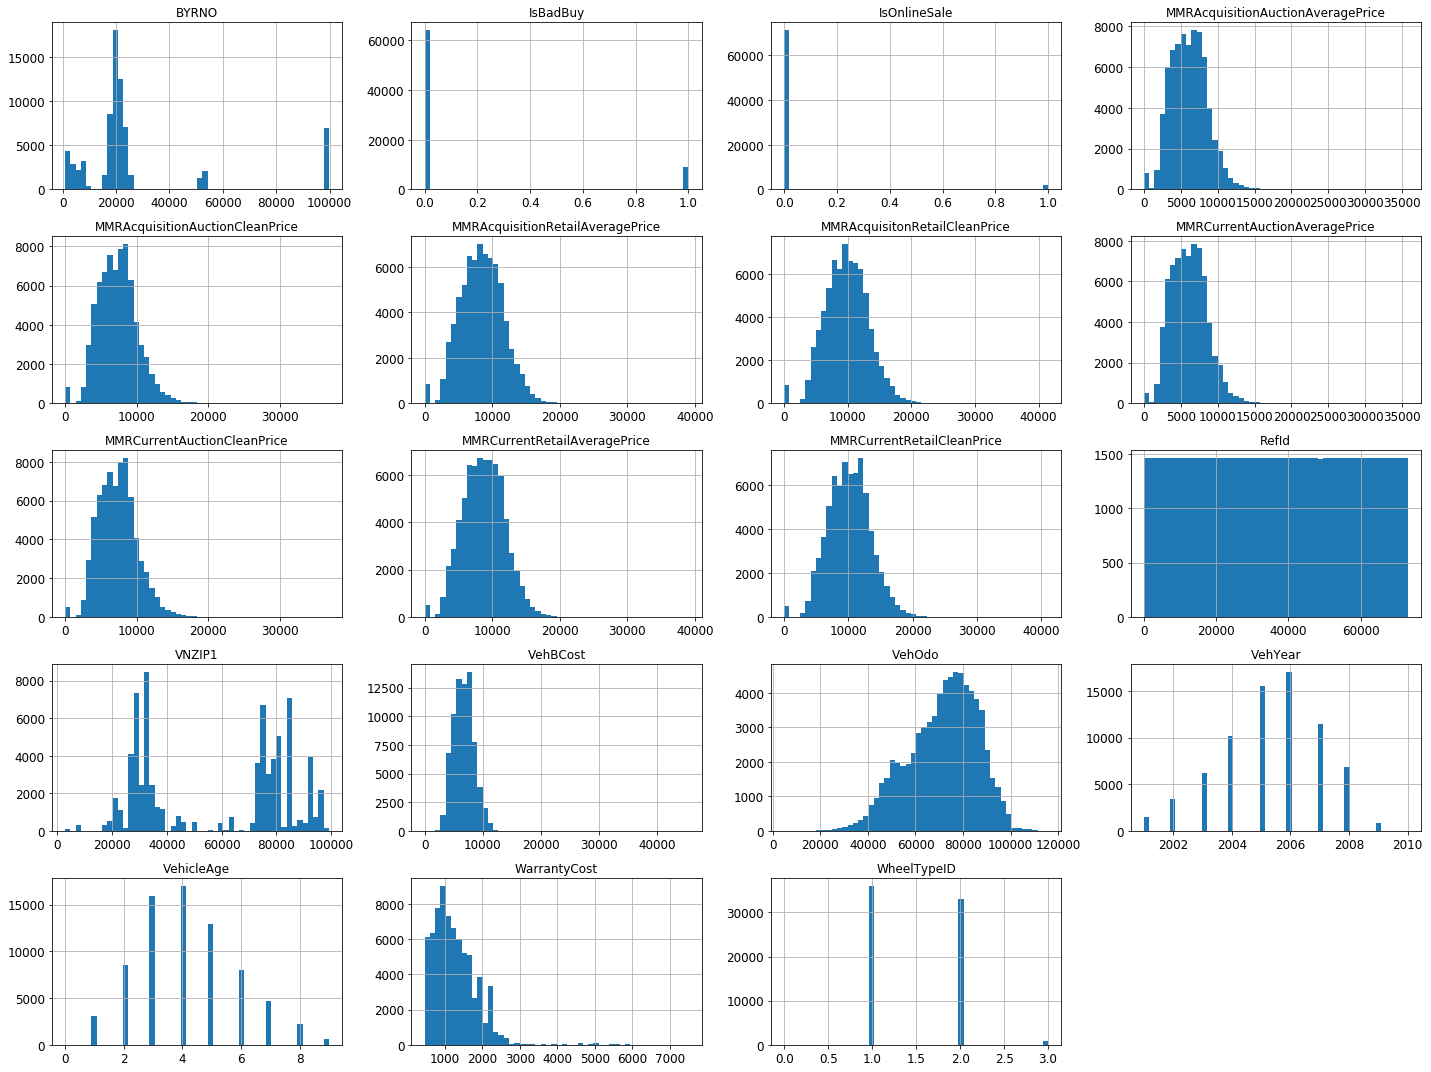

In [36]:
import matplotlib.pyplot as plt

car.hist(bins=50, figsize=(20,15))
plotting.save_fig('attribute_histogram_plots')
plt.show()

## Create a Test Set

After I know the data distribution, I would like to split training and test dataset. However, I needn't to split datasets because Kaggle already provides train(60%) and test(40%) dataset. (The scikit-learn provides a few functions to split datasets into multiple subsets in various ways.)

# 4. Discover and Visualize the Data to Gain Insights

## Looking for correlations

Since the dataset is not too large, I can easily compute the standard correlation coefficient(also called Pearson's r) between every pair of attributes using the corr().

In [37]:
corr_matrix = car.corr()
corr_matrix['IsBadBuy'].sort_values(ascending=False)

IsBadBuy                             1.000000
VehicleAge                           0.167164
VehOdo                               0.082560
WarrantyCost                         0.052319
RefId                                0.023973
VNZIP1                               0.005796
IsOnlineSale                        -0.003697
WheelTypeID                         -0.044620
BYRNO                               -0.061488
MMRAcquisitonRetailCleanPrice       -0.083665
MMRAcquisitionRetailAveragePrice    -0.087418
VehBCost                            -0.099911
MMRCurrentRetailCleanPrice          -0.100245
MMRAcquisitionAuctionCleanPrice     -0.102954
MMRCurrentRetailAveragePrice        -0.103914
MMRCurrentAuctionCleanPrice         -0.104020
MMRCurrentAuctionAveragePrice       -0.109112
MMRAcquisitionAuctionAveragePrice   -0.109252
VehYear                             -0.158886
Name: IsBadBuy, dtype: float64

## Experimenting with Attribute Combinations

One last thing I want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. The more miles per year driver drive; the more likely driver will more cause a kick car. 

In [38]:
car['miles_per_year'] = car['VehOdo'] / car['VehicleAge']
corr_matrix = car.corr()
corr_matrix['IsBadBuy'].sort_values(ascending=False)

IsBadBuy                             1.000000
VehicleAge                           0.167164
VehOdo                               0.082560
WarrantyCost                         0.052319
RefId                                0.023973
VNZIP1                               0.005796
IsOnlineSale                        -0.003697
WheelTypeID                         -0.044620
BYRNO                               -0.061488
MMRAcquisitonRetailCleanPrice       -0.083665
MMRAcquisitionRetailAveragePrice    -0.087418
VehBCost                            -0.099911
MMRCurrentRetailCleanPrice          -0.100245
MMRAcquisitionAuctionCleanPrice     -0.102954
MMRCurrentRetailAveragePrice        -0.103914
MMRCurrentAuctionCleanPrice         -0.104020
MMRCurrentAuctionAveragePrice       -0.109112
MMRAcquisitionAuctionAveragePrice   -0.109252
miles_per_year                      -0.112894
VehYear                             -0.158886
Name: IsBadBuy, dtype: float64

# 5. Prepare the data for Machine Learning algorithms

First, let separate the predictors and the labels since I don't necessarily want to apply the same transformations to the predictors and the target values.

In [39]:
car = loading.load_train_car_data()
car_labels = car['IsBadBuy'].copy()
car = car.drop(['IsBadBuy'], axis=1)

## Data Cleaning

Many times, I noticed that some attributes have some missing values. I can accomplish these easily using DataFrame's dropna(), drop(), and fillna() methods. Also, scikit-learn provides a handy class to take care of missing values: Imputer. Here, the feature was represented by a continuous value, I would replace the missing value with the average of the feature over the other samples.

In [40]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

Since the median can only be computed on numeriical attributes, I need to create a copy of the data without the text attribute.

In [41]:
car_num = car.select_dtypes(include=[np.number])

Now I fit the imputer instance to the training data using the fit() method.

In [42]:
imputer.fit(car_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance veriable.

In [43]:
imputer.statistics_

array([  3.65140000e+04,   2.00500000e+03,   4.00000000e+00,
         1.00000000e+00,   7.33610000e+04,   6.09700000e+03,
         7.30300000e+03,   8.44400000e+03,   9.78900000e+03,
         6.06200000e+03,   7.31300000e+03,   8.72900000e+03,
         1.01030000e+04,   1.96620000e+04,   7.31080000e+04,
         6.70000000e+03,   0.00000000e+00,   1.15500000e+03])

Now I use this "trained" imputer to transform the training set by replacing missing values by the learned medians.

In [44]:
X = imputer.transform(car_num)

Next, I put the median value back to replace the miss value.

In [45]:
car_num = pd.DataFrame(X, columns=car_num.columns)

## Handing Text and Categorical Attributes

Earlier I left out many categorical attributes because those are a text attribute so we cannot compute its median. Most Machine Learning algorithms prefer to work with numbers, so let's convert these text labels to numbers. The author of _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ provides a method to encoder these text labels. I can use this method to get one-hot encoding easily.

In [46]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

Before going any further, there are a couple of null values in the data that we need to do data clean. Here, the feature was represented with a discrete value, I would use most common value in this category to identify missing data. I create a class named CustomImputer, which is used to fill missing values with most frequent value or some word.

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

import pandas as pd
import numpy as np

class CustomImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, strategy='fill', filler='NA'):
        self.strategy = strategy
        self.filler = filler

    def fit(self, X, y=None):        
        if self.strategy == 'most_frequent':
           self.filler = X.mode().iloc[0]
        elif self.strategy == 'fill':
           self.filler = self.filler
        
        return self

    def transform(self, X, y=None):
        return X.fillna(self.filler)

In [48]:
car_cat = car.select_dtypes(include=['object'])
custom_imputer = CustomImputer(strategy='fill')
X = custom_imputer.transform(car_cat)
car_cat = pd.DataFrame(X, columns=car_cat.columns)

Next, I use the author method: CategoricalEncoder.

In [49]:
encoder = CategoricalEncoder(encoding='onehot-dense')
car_cat_1hot = encoder.fit_transform(car_cat)
car_cat_1hot

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Custom Transformets 

In previous, I need to add the custom attribute to the training dataset. Therefore, I want to create a custom transformer class in order to add this step into the pipeline.

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

import numpy as np

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, version='old', vehicle_age_index=4, miles_index=13):
        self.version = version
        self.vehicle_age_index = vehicle_age_index
        self.miles_index = miles_index
        
    def fit(self, X, y=None):
        if self.version is 'new':
            self.vehicle_age_index = 4
            self.miles_index = 9
        elif self.version is 'old':
            self.vehicle_age_index = 4
            self.miles_index = 13
        else:
            self.vehicle_age_index = self.vehicle_age_index
            self.miles_index = self.miles_index
            
        return self

    def transform(self, X, y=None):
        miles_per_year = X[:, self.miles_index] / (X[:, self.vehicle_age_index] + 1)

        return np.c_[X, miles_per_year]

In [51]:
attribs_adder = CombinedAttributesAdder()
X = attribs_adder.fit_transform(car.values)

I check we get the right value by adding the attributes back to the training dataset.

In [52]:
car_extra = pd.DataFrame(X, columns=list(car.columns)+['miles_per_year'])
car_extra.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,miles_per_year
0,1,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,12409,NaN,NaN,21973,33619,FL,7100,0,1113,22261.5
1,2,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,12791,NaN,NaN,19638,33619,FL,7600,0,1053,15598.8
2,3,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,8702,NaN,NaN,19638,33619,FL,4900,0,1389,14761.4
3,4,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,5518,NaN,NaN,19638,33619,FL,4100,0,630,10936.2
4,5,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,7911,NaN,NaN,19638,33619,FL,4000,0,1020,13873.4


## Feature Scaling

Scikit-Learn provides a transformer called StandardScaler for standardization.

## Transformation Pipelines

Scikit-Learn provides the Pipeline calss to help with such sequences of transformations. Now let's build a pipeline for preprocessing the numerical attributes.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
car_num_tr = num_pipeline.fit_transform(car_num)

Remember I need select value from Pandas DataFrame because Scikit-learn cannot handle it. I manually extract the numerical columns into a NumPy array, but I also write a transformer class to do it. 

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features.

In [55]:
num_attribs = list(car_num)
cat_attribs = list(car_cat)
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('custom_imputer', CustomImputer(strategy='fill')),
        ('selector', DataFrameSelector(cat_attribs)),
        ('encoder', CategoricalEncoder(encoding='onehot-dense')),
    ])

Next, I want to join there two pipelines into a single pipeline. Here, I use Scikit-Learn's FeatureUnion Class

In [56]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In the end, I run the whole pipeline easily.

In [57]:
car_prepared = full_pipeline.fit_transform(car)
car_prepared.shape

(72983, 2725)

# 6. Select and Train a Model 

Now, let's use the pipeline to prepare data and use an algorithm to train a model.

In [58]:
train_set = loading.load_train_car_data()
train_set_labels = train_set['IsBadBuy'].copy()
train_set = train_set.drop(['IsBadBuy'], axis=1)
train_set_prepared = full_pipeline.fit_transform(train_set)

## Training and Evaluating on the Training Set

Let's train a model with logistic regression algorithm.

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_set_prepared, train_set_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Better Evaluation Using Cross-Validation

Scikit-learn provide cross_val_score() can easily handle cross-validation.

In [60]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg, train_set_prepared, train_set_labels, 
                cv=5, scoring='accuracy')

array([ 0.89032744,  0.8834007 ,  0.88305015,  0.87798027,  0.89058646])

In the classification task, it has a much better way to evaluate the performance of a classifier is to look at the confusion matrix.

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

train_set_predictions = cross_val_predict(log_reg, 
                                          train_set_prepared, 
                                          train_set_labels, cv=5)
confusion_matrix(train_set_labels, train_set_predictions)

array([[62220,  1787],
       [ 6601,  2375]])

Thus, I get the precision of the classifier.

In [62]:
from sklearn.metrics import precision_score

precision_score(train_set_labels, train_set_predictions)

0.57063911580970683

Also, I get the recall of the classifier.

In [63]:
from sklearn.metrics import recall_score

recall_score(train_set_labels, train_set_predictions)

0.26459447415329768

Finally, I compute the F1 score.

In [64]:
from sklearn.metrics import f1_score

f1_score(train_set_labels, train_set_predictions)

0.36154665854772411

Alternately, I can evaluate the performance of a classifier using ROC.

In [65]:
train_set_scores = cross_val_predict(log_reg, 
                                     train_set_prepared, 
                                     train_set_labels, 
                                     cv=5,
                                     method='decision_function')

Now, let's get ROC curve and plot it.

Saving figure roc_before_modify_feature_before_tune


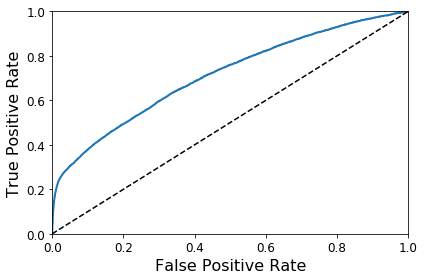

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_set_labels, train_set_scores)
plotting.plot_roc_curve(fpr, tpr, 'Logistic Regression')
plotting.save_fig('roc_before_modify_feature_before_tune')
plt.show()

Finally, I get the AUC of the classifier.

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_set_labels, train_set_scores)

0.7126925448801319

# 7. Fine-Tune Your Model

From the last section, my result is really bad. But, do not worry about it. Let first search the better hyperparameter for that. Second, I evaluate the importance of the features. Therefore, I try to delete some un-important features and redefine text and categorical attributes

In [68]:
train_set = loading.load_train_car_data()
train_set_labels = train_set['IsBadBuy'].copy()
train_set = train_set.drop(['IsBadBuy'], axis=1)
train_set_prepared = full_pipeline.transform(train_set)

## Grid Search

I do not need to find the hyperparameters manually. Instead, I should get Scikit-Learn's GridSearchCV to search.

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_iter': [150, 200],
               'penalty': ['l1', 'l2'],
               'C': [0.1, 0.2]}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                           scoring='f1',
                           pre_dispatch=4)
grid_search.fit(train_set_prepared, train_set_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_iter': [150, 200], 'penalty': ['l1', 'l2'], 'C': [0.1, 0.2]}],
       pre_dispatch=4, refit=True, return_train_score='warn', scoring='f1',
       verbose=0)

I check the best hyperparameters like this.

In [70]:
grid_search.best_params_

{'C': 0.1, 'max_iter': 150, 'penalty': 'l1'}

I can see the best estimator like this:

In [71]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

And of course the evaluation scores are also available.

In [72]:
from __future__ import print_function

cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.350356023913 {'C': 0.1, 'max_iter': 150, 'penalty': 'l1'}
0.350073693012 {'C': 0.1, 'max_iter': 150, 'penalty': 'l2'}
0.350353355899 {'C': 0.1, 'max_iter': 200, 'penalty': 'l1'}
0.350073693012 {'C': 0.1, 'max_iter': 200, 'penalty': 'l2'}
0.350099611952 {'C': 0.2, 'max_iter': 150, 'penalty': 'l1'}
0.349126934224 {'C': 0.2, 'max_iter': 150, 'penalty': 'l2'}
0.349935699865 {'C': 0.2, 'max_iter': 200, 'penalty': 'l1'}
0.349126934224 {'C': 0.2, 'max_iter': 200, 'penalty': 'l2'}


## Randomized Search

When hyperparameter search space is large, I often use RandomizedSearchCV.

## Ensemble Methods

In the future work, I will try ensemble methods.

## Analyze the Best Models and Their Errors

The logistic regression can indicate the relative importance of each attribute for making accurate predictions. So, let's try this.

In [73]:
feature_importances = grid_search.best_estimator_.coef_
feature_importances.tolist()

[[0.05296131253112603,
  0.22721492430372478,
  0.6546312353361732,
  -0.25130939004591357,
  0.1171485586521415,
  -0.3132294593693501,
  0.0,
  0.38468036837700686,
  0.0,
  0.29297532831856005,
  0.20942853167257655,
  -0.24667602546027093,
  -0.19829751579512275,
  -0.14900700620728763,
  -0.06960978191180815,
  -0.25324700906225134,
  -0.041061296449173834,
  0.08112558515483562,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -1.7770294881023059,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.06943522584445425,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.19761290717745608,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.057590960762398405,
  0.0,
  0.11305990794898836,
  0.0,
  -0.04518061041067633,
  0.0,
  0.0,


Let's display these importance scores next to their corresponding attribute names.

In [74]:
extra_attribs = ['miles_per_year']
encoder = cat_pipeline.named_steps['encoder']
cat_1hot_attribs = list(encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_1hot_attribs
sorted(zip(feature_importances[0], attributes), reverse=True)

[(0.65463123533617318, 'VehicleAge'),
 (0.38468036837700686, 'MMRAcquisitionRetailAveragePrice'),
 (0.29297532831856005, 'MMRCurrentAuctionAveragePrice'),
 (0.25778886804491746, '11/23/2010'),
 (0.2441924469576367, '12/8/2010'),
 (0.24321095862505712, '9/29/2009'),
 (0.24168528258576388, '12/9/2010'),
 (0.22721492430372478, 'VehYear'),
 (0.22174212157044343, '12/1/2009'),
 (0.22113708385492747, '12/22/2010'),
 (0.21291319007089488, '11/2/2010'),
 (0.20942853167257655, 'MMRCurrentAuctionCleanPrice'),
 (0.19050033321560766, '11/3/2009'),
 (0.17315768995109082, '9/23/2009'),
 (0.11714855865214149, 'VehOdo'),
 (0.11305990794898836, '10/27/2009'),
 (0.093970513266114608, '9/22/2010'),
 (0.093072781265397975, '12/7/2010'),
 (0.081125585154835617, 'WarrantyCost'),
 (0.071442753669169135, '6/30/2009'),
 (0.052961312531126029, 'RefId'),
 (0.045501497855388866, '9/10/2009'),
 (0.036728384283614857, '10/7/2009'),
 (0.0, 'miles_per_year'),
 (0.0, 'MMRAcquisitonRetailCleanPrice'),
 (0.0, 'MMRAcquis

Here, let's write some custom function to drop some un-important features and re-define some text and categorical attributes. I have already written these function in the loading class. Let's see how the result will be. 

In [75]:
loading.redefine_train_category(data_name='train_set')
train_set_new = loading.load_train_car_data(version='new')
train_set_labels_new = train_set_new['IsBadBuy'].copy()
train_set_new = train_set_new.drop(['IsBadBuy'], axis=1)
train_set_num = train_set_new.select_dtypes(include=[np.number])
train_set_cat = train_set_new.select_dtypes(include=['object'])
num_attribs_new = list(train_set_num)
cat_attribs_new = list(train_set_cat)
num_pipeline_new = Pipeline([
        ('selector', DataFrameSelector(num_attribs_new)),
        ('imputer', Imputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder(version='new')),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline_new = Pipeline([
        ('custom_imputer', CustomImputer(strategy='fill')),
        ('selector', DataFrameSelector(cat_attribs_new)),
        ('encoder', CategoricalEncoder(encoding='onehot-dense')),
    ])
full_pipeline_new = FeatureUnion(transformer_list=[
        ("num_pipeline_new", num_pipeline_new),
        ("cat_pipeline_new", cat_pipeline_new),
    ])
train_set_prepared_new = full_pipeline_new.fit_transform(train_set_new)

Now let's use new data to train it and get best hyperparameters.

In [76]:
param_grid = [{'max_iter': [100, 150],
               'penalty': ['l1', 'l2'],
               'C': [0.05, 0.1]}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                           scoring='f1',
                           pre_dispatch=4)
grid_search.fit(train_set_prepared_new, train_set_labels_new)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_iter': [100, 150], 'penalty': ['l1', 'l2'], 'C': [0.05, 0.1]}],
       pre_dispatch=4, refit=True, return_train_score='warn', scoring='f1',
       verbose=0)

Now let's evaluate the performance of our classifier using F1 score. 

In [77]:
final_model = grid_search.best_estimator_
train_set_predictions_log = cross_val_predict(final_model, 
                                              train_set_prepared_new, 
                                              train_set_labels_new, cv=5)
f1_score(train_set_labels_new, train_set_predictions_log)

0.355689022355689

Alternately, I evaluate the performance of a classifier using AUC.

In [78]:
train_set_scores_log = cross_val_predict(final_model, 
                                         train_set_prepared_new, 
                                         train_set_labels_new, 
                                         cv=5,
                                         method='decision_function')
roc_auc_score(train_set_labels_new, train_set_scores_log)

0.7324928855542121

I can try different classification algorithms for this project. Let's do the random forest algorithm, and get the F1 score for this model.

In [79]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(train_set_prepared_new, train_set_labels_new)
train_set_predictions_forest = cross_val_predict(forest_clf, 
                                                 train_set_prepared_new, 
                                                 train_set_labels_new, cv=5)
f1_score(train_set_labels_new, train_set_predictions_forest)

0.24229845765677777

Next, I get the AUC for this classifier.

In [80]:
train_set_probas_forest = cross_val_predict(forest_clf, 
                                            train_set_prepared_new, 
                                            train_set_labels_new, 
                                            cv=5,
                                            method='predict_proba')
train_set_scores_forest = train_set_probas_forest[:, 1]
roc_auc_score(train_set_labels_new, train_set_scores_forest)

0.60583721614589447

Similarly, I try nonlinear SVM algorithm. And let's get the F1 score for this model.

In [81]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='poly')
svm_clf.fit(train_set_prepared_new, train_set_labels_new)
train_set_predictions_svm = cross_val_predict(svm_clf, 
                                              train_set_prepared_new, 
                                              train_set_labels_new, cv=5)
f1_score(train_set_labels_new, train_set_predictions_svm)

0.25284143841997392

Similarly, I get the AUC for this classifier.

In [83]:
train_set_scores_svm = cross_val_predict(svm_clf, 
                                         train_set_prepared_new, 
                                         train_set_labels_new, 
                                         cv=5,
                                         method='decision_function')
roc_auc_score(train_set_labels_new, train_set_scores_svm)

0.65603433644331521

Finally, let's get ROC curve for all three classifier and compare it.

Saving figure roc_three_classifier


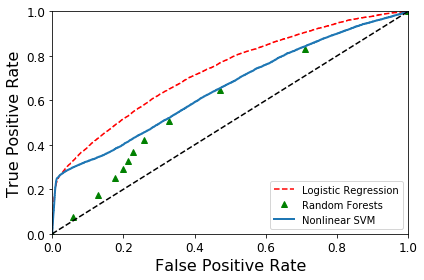

In [85]:
fpr_log, tpr_log, thresholds_log = roc_curve(train_set_labels_new, 
                                             train_set_scores_log)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_new, 
                                                      train_set_scores_forest)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(train_set_labels_new, 
                                             train_set_scores_svm)
plt.plot(fpr_log, tpr_log, 'r--', label='Logistic Regression')
plt.plot(fpr_forest, tpr_forest, 'g^', label='Random Forests')
plotting.plot_roc_curve(fpr_svm, tpr_svm, 'Nonlinear SVM')
plt.legend(loc='lower right')
plotting.save_fig('roc_three_classifier')
plt.show()

## Evaluate Your System on the Test Set

There is nothing special about this process; just get the predictors and the labels from the test set, run our full_pipeline to transform. 

In [86]:
loading.redefine_test_category(data_name='test_set')
test_set = loading.load_test_car_data(version='new')
test_labels = loading.load_test_labels_car_data()
test_set_labels = test_labels['IsBadBuy'].copy()
test_set_prepared = full_pipeline_new.fit_transform(test_set)

Now, I evaluate the accuracy of the prediction on the testing dataset. First, let's do the logistic regression model.

In [87]:
from sklearn.metrics import accuracy_score

test_set_predictions_log = final_model.predict(test_set_prepared)
accuracy_score(test_set_labels, test_set_predictions_log)

0.95795265567577559

Next, let's do the random forest model.

In [88]:
test_set_predictions_forest = forest_clf.predict(test_set_prepared)
accuracy_score(test_set_labels, test_set_predictions_forest)

0.95965672285297798

Finally, let's do the nonlinear SVM model.

In [89]:
test_set_predictions_svm = svm_clf.predict(test_set_prepared)
accuracy_score(test_set_labels, test_set_predictions_svm)

0.96799228037037799